# **A. Clasificación con Scikit-learn y MLflow

In [7]:
!pip install pandas numpy mlflow scikit-learn pyngrok


In [5]:
# Carga de librerias
# Importar bibliotecas necesarias
import pandas as pd
import numpy as np
import mlflow
import mlflow.sklearn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression  # Clasificador
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.datasets import load_breast_cancer

print('Librerias listas...')

Librerias listas...


In [ ]:
#1. Carga del Conjunto de Datos
#uso del conjunto  cancer = load_breast_cancer()
cancer = load_breast_cancer()



# Creación de un DataFrame::
df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
df['target'] = cancer['target']

#Visualización de los Primeros Registros:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
#Dimensiones del DataFrame:
df.shape

(569, 31)

**# Análisis de Datos con Scikit-Learn**

In [ ]:
print("Primeras filas del dataset:")
print(df.head())



Primeras filas del dataset:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  

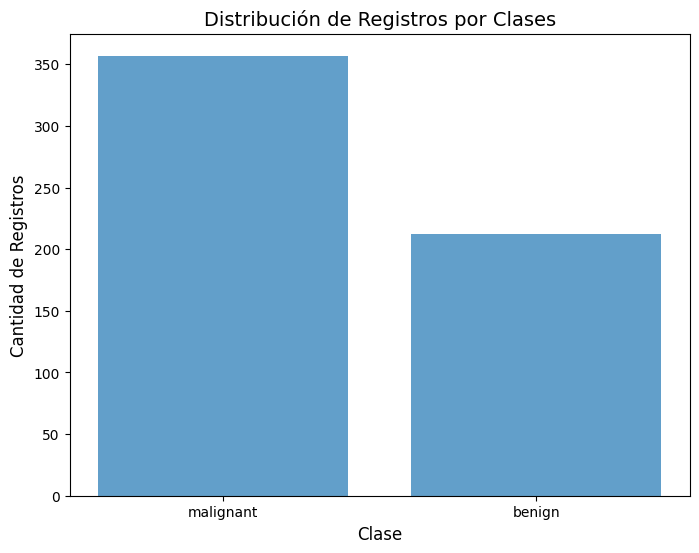

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_breast_cancer

# Cargar el conjunto de datos
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Contar la cantidad de registros benignos y malignos
counts = df['target'].value_counts()
labels = [data.target_names[0], data.target_names[1]]  # Nombres de las clases

# Crear el gráfico
plt.figure(figsize=(8, 6))
plt.bar(labels, counts, alpha=0.7)
plt.title('Distribución de Registros por Clases', fontsize=14)
plt.ylabel('Cantidad de Registros', fontsize=12)
plt.xlabel('Clase', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


In [ ]:
#Preparación modelo

# Separar características (X) y etiquetas (y)
X = df.drop(columns='target')
y = df['target']

# 2. Preprocesamiento: Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Crear un pipeline de preprocesamiento y modelo
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Escalado de características
    ('classifier', LogisticRegression(  # Modelo de Regresión Logística
              class_weight="balanced", # debido a los resultados de dsitribucion por claes
              max_iter=1000,
              random_state=42))
])




In [ ]:
#Optimización de Hiperparámetros

from sklearn.model_selection import GridSearchCV

param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100]
}

# Usar GridSearchCV para encontrar el mejor valor de C basado en el recall
grid_search = GridSearchCV(
    pipeline, param_grid, cv=5, scoring='recall', n_jobs=-1
)
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo encontrado
best_pipeline = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Mejor parámetro de regularización C:", best_params['classifier__C'])



Mejor parámetro de regularización C: 0.1


In [ ]:
# Realizar predicciones con el modelo ajustado
y_pred_best = best_pipeline.predict(X_test)

# Evalua acoin de modelo el modelo
accuracy = accuracy_score(y_test, y_pred_best)
precision = precision_score(y_test, y_pred_best)
recall = recall_score(y_test, y_pred_best)

print("\nResultados del Modelo con recomendacoines de optimizacion paramentro C:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")




Resultados del Modelo con recomendacoines de optimizacion paramentro C:
Accuracy: 0.9649
Precision: 0.9857
Recall: 0.9583


In [ ]:
#Entrenamiento Modelo sin optimizacion
pipeline.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba sinoptimizaoin
y_pred = pipeline.predict(X_test)

# Evaluacion  del modelo
print("\nResultados del Modelo:")
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")



Resultados del Modelo:
Accuracy: 0.9561
Precision: 0.9855
Recall: 0.9444


1. El modelo  sin opptmizacion consigue propuesto clasifica  corecatamente  el 95.61% de los
registros (menor que el obtenido en clase; La precisión  de 98,55% es alta indica que el modelo tiene muy pocos falsos positivos (es decir, predice correctamente que un tumor es maligno cuando realmente lo es); El recall ligeramente más bajo indica que el modelo pierde algunos verdaderos positivos (tumores malignos que no detecta correctamente).

2. Debido a la naturaleza del caso (detecatar casos de cancer se busac mejorar el Recall) con lo que se consiguen lossiguientes resultados:Accuracy: 0.9561; Precision: 0.9855; Recall: 0.9444

# **B. Registro de Métricas en MLflow**

In [ ]:
!pip install mlflow pyngrok
!ngrok config add-authtoken 2q8J2TuNkPPszG3UVbFRqnBIBqE_6S7JTdtvZCykGko6LS24g

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
#:publicacion de  mlflow_ui_process  por meido de https://dashboard.ngrok.com/
import subprocess
from pyngrok import ngrok




# Iniciar MLflow UI en el puerto 5000
mlflow_ui_process = subprocess.Popen(['mlflow', 'ui', '--port', '5000'])

# Exponer el puerto 5000 usando ngrok
ngrok_tunnel = ngrok.connect(addr=5000, proto='http')  #
print(f"MLflow UI está disponible en: {ngrok_tunnel.public_url}")


MLflow UI está disponible en: https://ea12-34-125-183-165.ngrok-free.app


In [ ]:

from sklearn.model_selection import GridSearchCV

# Registrar métricas e hiperparámetros en MLflow
mlflow.set_experiment("logistic_regression_experiments_cancer")  # Nombre del experimento


n_stimators = [100,110,120]


for i in n_stimators:
  with mlflow.start_run():  # Iniciar un nuevo registro de MLflow
  # Crear un pipeline inicial con LogisticRegression
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Escalado de características
        ('classifier', LogisticRegression(random_state=42))  # Modelo de Regresión Logística
    ])


    # Configurar GridSearchCV para evaluar diferentes valores de max_iter
    grid_search = GridSearchCV(
        pipeline, param_grid, cv=5, scoring='recall', n_jobs=-1
    )
    grid_search.fit(X_train, y_train)

    # Obtener el mejor modelo
#    best_pipeline = grid_search.best_estimator_
 #   best_params = grid_search.best_params_

  #  print("Mejor valor de max_iter:", best_params['classifier__max_iter'])

    # Realizar predicciones con el mejor modelo
   # y_pred = best_pipeline.predict(X_test)

    # Evaluar el modelo
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)




    # Registrar hiperparámetros
    mlflow.log_param("max_iter", n_stimators)

    # Registrar métricas
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)

    # Registrar el modelo entrenado
    mlflow.sklearn.log_model(best_pipeline, "model_"+str(i))
    print("\nModelo registrado en MLflow "+str(i)+" ...")

2024/12/16 18:37:27 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



Modelo registrado en MLflow 100 ...


2024/12/16 18:37:32 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



Modelo registrado en MLflow 110 ...


2024/12/16 18:37:37 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



Modelo registrado en MLflow 120 ...


2024/12/16 18:37:41 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



Modelo registrado en MLflow 130 ...


 # **C. Imagenes de la interfaz de MLFlow en el notebook:**






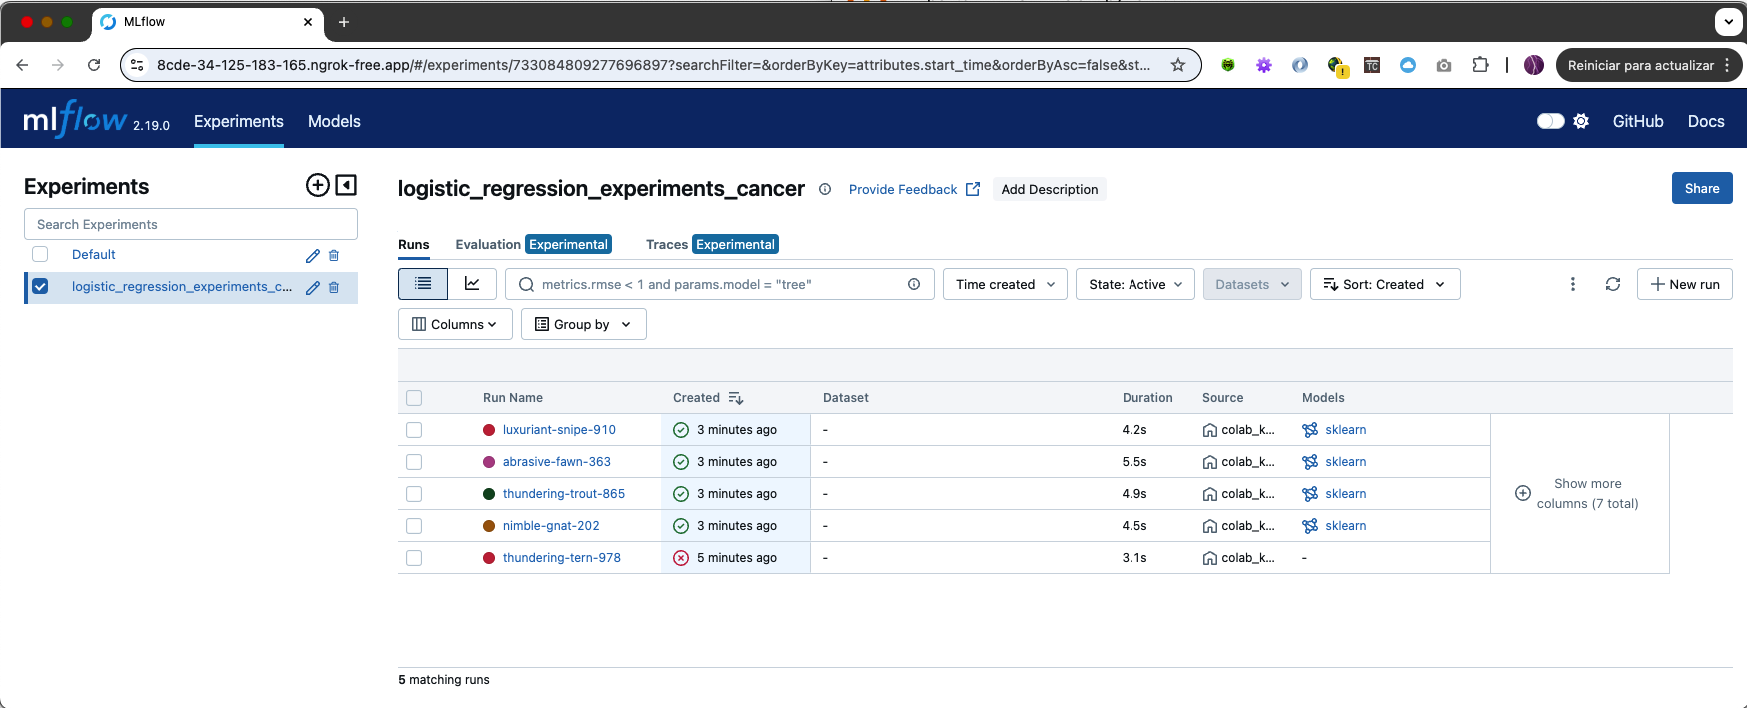

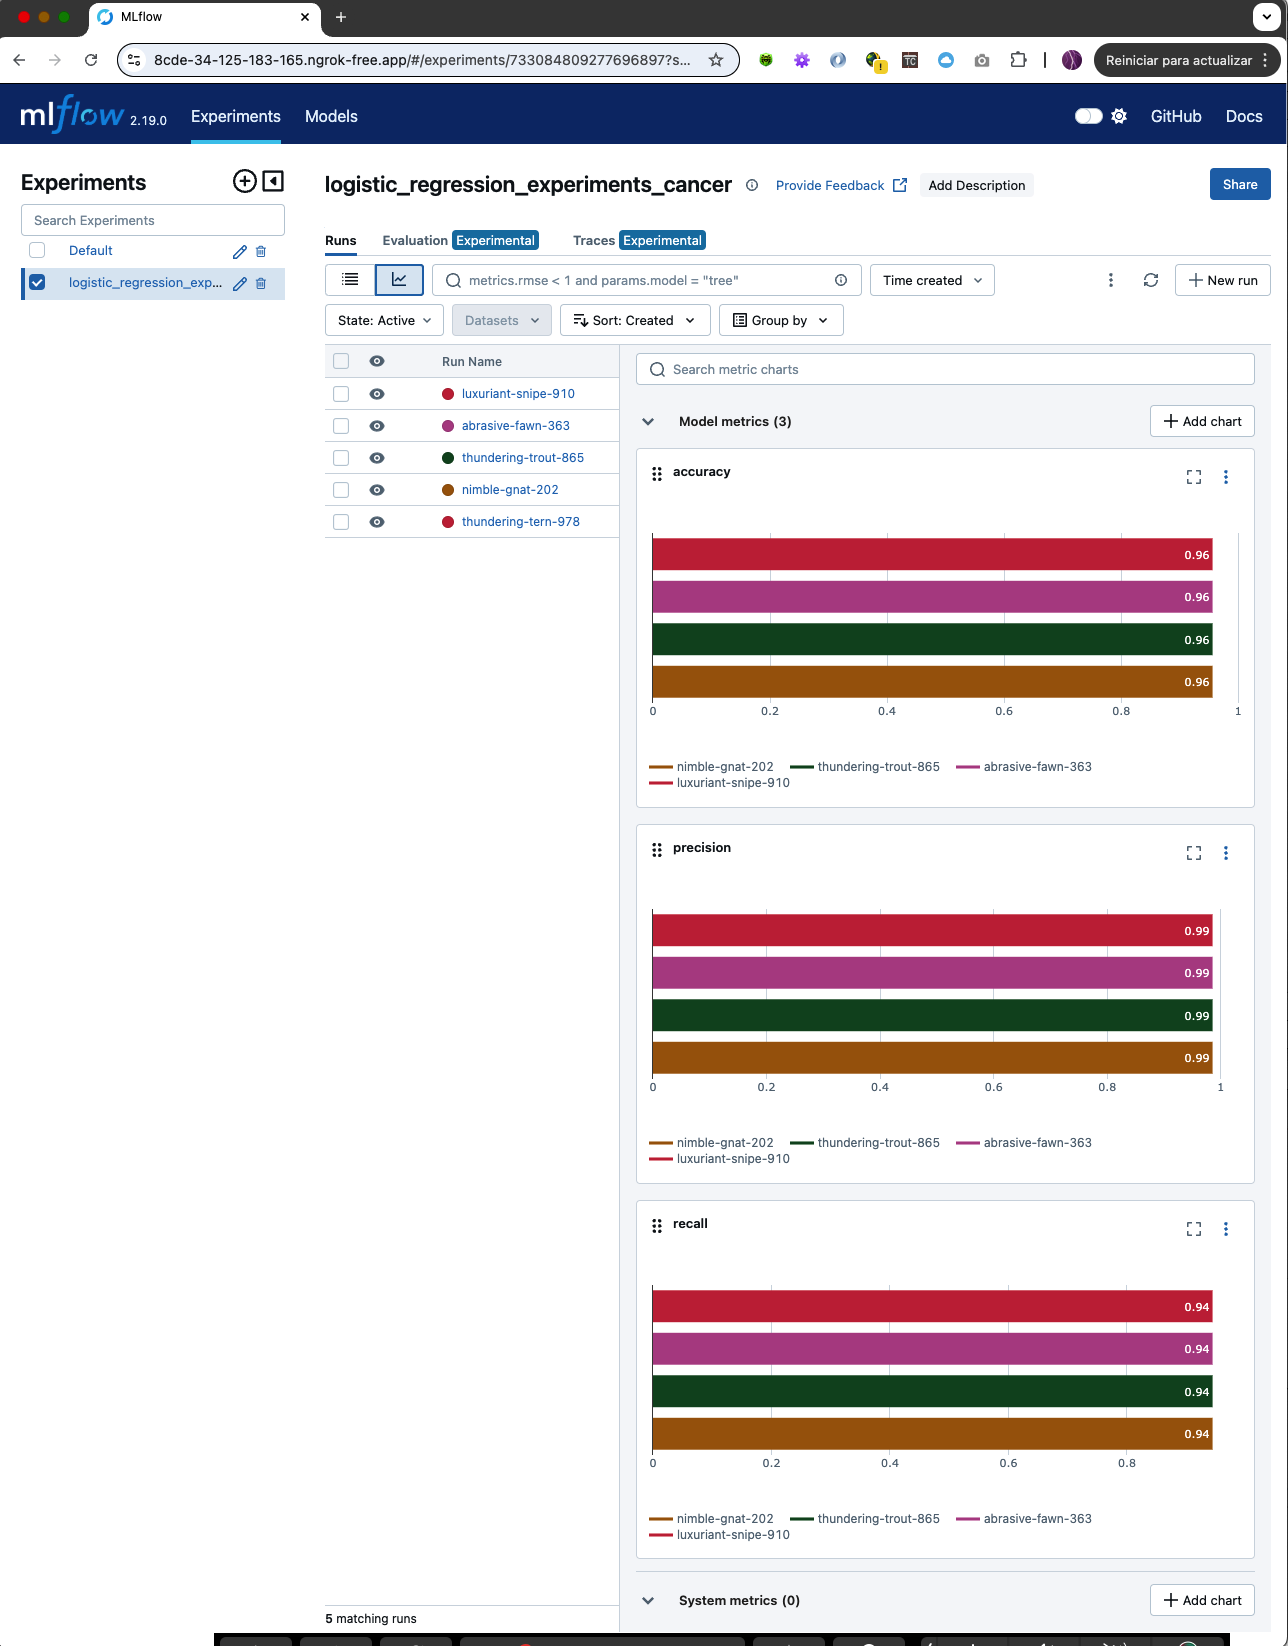

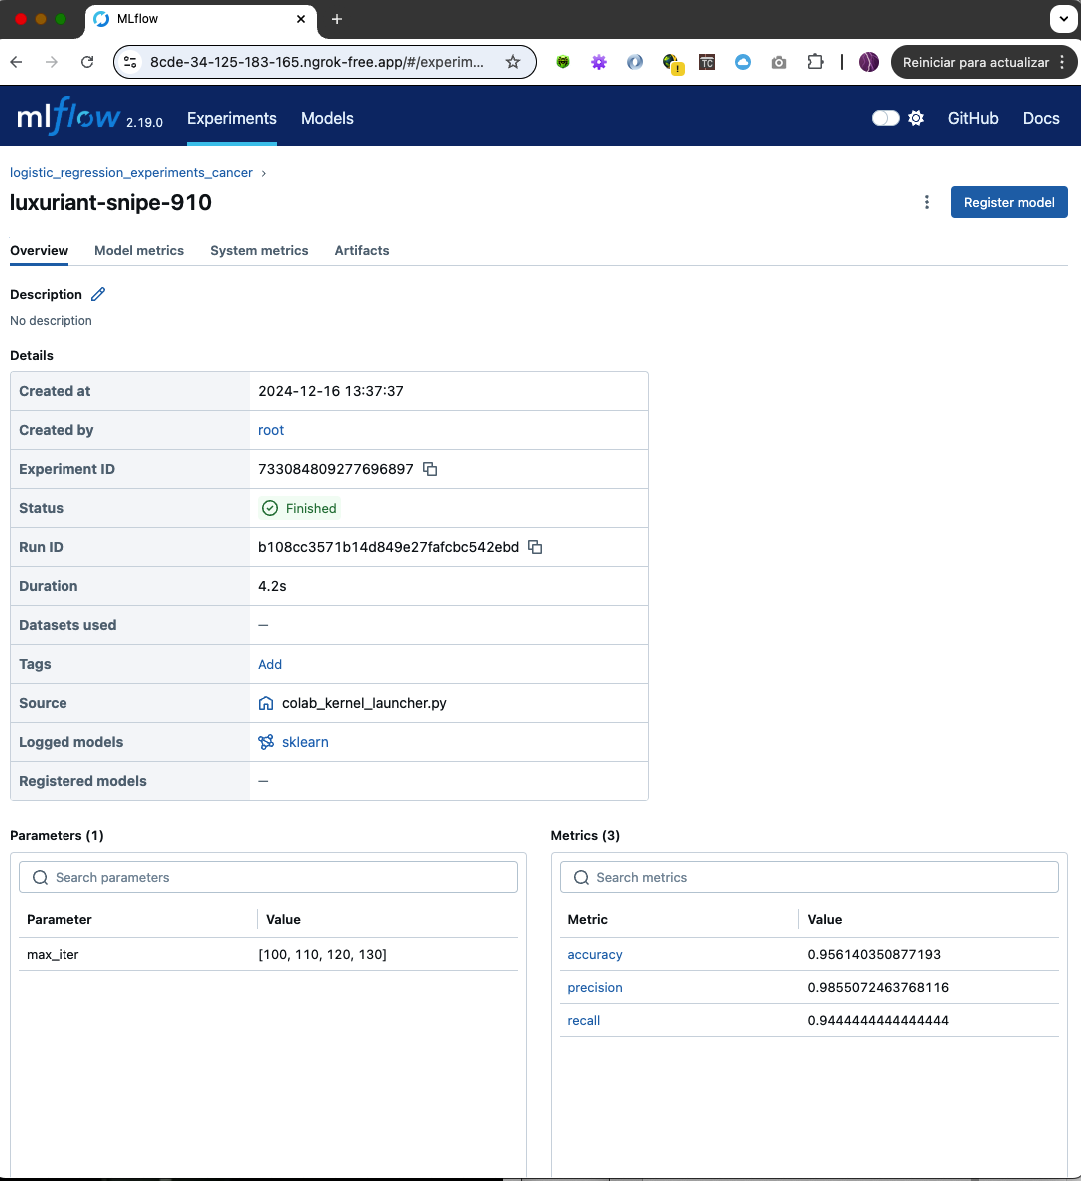

 # **D. Generar .py de funciones y main  **


In [11]:
!ngrok config add-authtoken 2q8J2TuNkPPszG3UVbFRqnBIBqE_6S7JTdtvZCykGko6LS24g

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [12]:
import pandas as pd
import numpy as np
import mlflow
import mlflow.sklearn
import subprocess
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.datasets import load_breast_cancer
from pyngrok import ngrok
import time




def start_mlflow_with_ngrok(port=5000, protocolo='http'):
    """
    Inicia la UI de MLflow en el puerto especificado y la expone públicamente usando ngrok.

    Args:
        port (int): El puerto en el que se ejecutará la MLflow UI (por defecto 5000).
        protocolo(string) :  http,https

    Returns:
        str: URL pública generada por ngrok para acceder a la MLflow UI.
    """
    try:
        # Iniciar MLflow UI en el puerto especificado
        print(f"Iniciando MLflow UI en el puerto {port}...")
        mlflow_ui_process = subprocess.Popen(['mlflow', 'ui', '--port', str(port)], stdout=subprocess.PIPE, stderr=subprocess.PIPE)

        # Exponer el puerto usando ngrok
        print("Exponiendo el servidor con ngrok...")
        ngrok_tunnel = ngrok.connect(addr=port, proto=protocolo)
        public_url = ngrok_tunnel.public_url
        print(f"MLflow UI está disponible en: {public_url}")

        return public_url, mlflow_ui_process
    except Exception as e:
        print(f"Error al iniciar MLflow con ngrok: {e}")
        return None, None




def load_and_split_data(test_size=0.2, random_state=42):
    """
    Cargar el conjunto de datos de cáncer de mama y dividirlo en entrenamiento y prueba.
    """
    data = load_breast_cancer()
    df = pd.DataFrame(data.data, columns=data.feature_names)
    df['target'] = data.target
    X = df.drop(columns='target')
    y = df['target']
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y
    )
    return X_train, X_test, y_train, y_test, data

def create_pipeline():
    """
    Crear un pipeline con StandardScaler y LogisticRegression.
    """
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', LogisticRegression(random_state=42))
    ])
    return pipeline



def perform_grid_search(X_train, y_train, param_grid):
    """
    Realizar una búsqueda de hiperparámetros con GridSearchCV.
    """
    pipeline = create_pipeline()
    grid_search = GridSearchCV(
        pipeline, param_grid, cv=5, scoring='recall', n_jobs=-1
    )
    grid_search.fit(X_train, y_train)
    return grid_search


def evaluate_model(best_pipeline, X_test, y_test):
    """
    Evaluar el modelo con métricas como accuracy, precision y recall.
    """
    y_pred = best_pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print("\nResultados del Modelo:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    return accuracy, precision, recall, y_pred


def log_experiment(max_iter, accuracy, precision, recall, best_pipeline, experiment_name="logistic_regression_experiments"):
    """
    Registrar métricas, hiperparámetros y el modelo en MLflow.
    """
    mlflow.set_experiment(experiment_name)
    with mlflow.start_run():
        # Registrar hiperparámetros
        mlflow.log_param("max_iter", max_iter)

        # Registrar métricas
        mlflow.log_metric("accuracy", accuracy)
        mlflow.log_metric("precision", precision)
        mlflow.log_metric("recall", recall)

        # Registrar el modelo entrenado
        mlflow.sklearn.log_model(best_pipeline, "model")
        print(f"\nModelo registrado en MLflow con max_iter={max_iter}.")


def main():
    """
    Función principal para cargar datos, realizar búsqueda de hiperparámetros y registrar modelos en MLflow.
    """
    total_start_time = time.time()  # Tiempo total de ejecución

    # Iniciar MLflow con ngrok
    start_time = time.time()
    public_url, mlflow_process = start_mlflow_with_ngrok(port=5000, protocolo='http')
    elapsed_time = (time.time() - start_time) * 1000
    print(f"Tiempo de ejecución (start_mlflow_with_ngrok): {elapsed_time:.2f} ms")

    if public_url:
        print(f"Accede a la MLflow UI aquí: {public_url}")



    # 1. Cargar datos
    start_time = time.time()
    X_train, X_test, y_train, y_test, data = load_and_split_data()
    elapsed_time = (time.time() - start_time) * 1000
    print(f"Tiempo de ejecución (load_and_split_data): {elapsed_time:.2f} ms")


    # 2. Definir la rejilla de hiperparámetros
    param_grid = {
        'classifier__max_iter': [100, 500, 1000, 2000]  # Variar max_iter
    }

    # 3. Realizar búsqueda de hiperparámetros
    start_time = time.time()
    grid_search = perform_grid_search(X_train, y_train, param_grid)
    elapsed_time = (time.time() - start_time) * 1000
    print(f"Tiempo de ejecución (perform_grid_search): {elapsed_time:.2f} ms")

    # 4. Obtener el mejor modelo y sus parámetros
    start_time = time.time()
    best_pipeline = grid_search.best_estimator_
    best_params = grid_search.best_params_
    print("Mejor valor de max_iter:", best_params['classifier__max_iter'])
    elapsed_time = (time.time() - start_time) * 1000
    print(f"Tiempo de ejecución (mejor modelo y sus parámetros): {elapsed_time:.2f} ms")


    # 5. Evaluar el modelo
    start_time = time.time()
    accuracy, precision, recall, y_pred = evaluate_model(best_pipeline, X_test, y_test)
    elapsed_time = (time.time() - start_time) * 1000
    print(f"Tiempo de ejecución (evaluate_model): {elapsed_time:.2f} ms")


    # 6. Registrar el modelo en MLflow
    start_time = time.time()
    log_experiment(
        max_iter=best_params['classifier__max_iter'],
        accuracy=accuracy,
        precision=precision,
        recall=recall,
        best_pipeline=best_pipeline
    )
    elapsed_time = (time.time() - start_time) * 1000
    print(f"Tiempo de ejecución (log_experiment): {elapsed_time:.2f} ms")

    print("Proceso completado.")


if __name__ == "__main__":
    main()


Iniciando MLflow UI en el puerto 5000...
Exponiendo el servidor con ngrok...
MLflow UI está disponible en: https://765e-104-199-184-38.ngrok-free.app
Tiempo de ejecución (start_mlflow_with_ngrok): 1120.80 ms
Accede a la MLflow UI aquí: https://765e-104-199-184-38.ngrok-free.app
Tiempo de ejecución (load_and_split_data): 46.01 ms
Tiempo de ejecución (perform_grid_search): 720.62 ms
Mejor valor de max_iter: 100
Tiempo de ejecución (mejor modelo y sus parámetros): 0.82 ms

Resultados del Modelo:
Accuracy: 0.9825
Precision: 0.9861
Recall: 0.9861
Tiempo de ejecución (evaluate_model): 22.22 ms


2024/12/16 20:04:49 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



Modelo registrado en MLflow con max_iter=100.
Tiempo de ejecución (log_experiment): 4657.53 ms
Proceso completado.
